In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd 

In [2]:
import sys 

sys.path.append("../../pvt")

In [3]:
from pypvt.pvt_correlations.oil_correlation import Oil

In [4]:
# bubble point pressure 
c= Oil()

help(c.oil_pbubble)

Help on method oil_pbubble in module pypvt.pvt_correlations.oil_correlation:

oil_pbubble(rs, sto_api, sg_gas, temp, correlation='standing', unit_system='metric') method of pypvt.pvt_correlations.oil_correlation.Oil instance
        calculate oil bubble pressure based on several correlations 
        Most of the correlation are part of the SPE monograph manual            
    
    Parameters
    ----------
        rs : float
            single-stage gas-oil solution ratio (metric: sm3/sm3, field: scf/stb)
        sto_api : float
            stock tank oil API gravity
        sg_gas : float
            specific gravity of surface gas
        temp : float
            reservoir temperature (metric: Celcius, field Farenheit)
        correlation : str 
            standing : based on Standing bubble-point correlation 
                        Application range : lighter volatile oils, low res. temperatures               
            vazquezbeggs : based on Vazquez and Beggs correlation 
    

In [5]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]

data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep
oil_sample,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60
2,220,2630,768,1.474,40.95,40.7,0.855,100,75
3,260,2051,693,1.529,37.37,48.6,0.911,100,72
4,237,2884,968,1.619,38.92,40.5,0.898,60,120
5,218,3065,943,1.570,37.70,44.2,0.781,200,60
6,180,4239,807,1.385,46.79,27.3,0.848,85,173


In [6]:
# calculate an sg_gas at sep condition 
results=[]
for index, row in data.iterrows():
    x = c.sg_gas_sep(sg_gas = row['sg_gas'] , sto_api = row['sto_api'], t_sep = row['t_sep'], p_sep = row['p_sep'], unit_system='field')
    results.append(x)

data ['sg_gas_sep'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185


In [7]:
results=[]
for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['pb_standing'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779


In [8]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['pb_vasquezbeggs'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs
oil_sample,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020


In [9]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas_sep'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['pb_vasquezbeggs_new'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437


In [10]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='glaso', unit_system='field')
    results.append(x)
data['pb_glaso'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso
oil_sample,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456


In [11]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='marhoun', unit_system='field')
    results.append(x)
data['pb_marhoun'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso,pb_marhoun
oil_sample,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864,2406.962552
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207,2567.642703
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256,1984.211159
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220,2865.580807
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684,3295.661048
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456,3215.741060


In [238]:
results=[]

for index, row in data.iterrows():
    x = c.oil_pbubble(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['pb_petrosky'] = results

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,sg_gas_sep,pb_standing,pb_vasquezbeggs,pb_vasquezbeggs_new,pb_glaso,pb_marhoun,pb_petrosky
oil_sample,,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,0.867568,2181.309967,2368.594438,2330.429896,2430.704864,2406.962552,2330.906165
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,0.845810,2502.882413,2740.071019,2765.132344,2796.755207,2567.642703,2767.646436
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,0.899775,1882.525929,2041.648794,2063.086228,2082.879256,1984.211159,1892.580253
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,0.825391,3040.353569,3309.753048,3553.395738,3295.124220,2865.580807,3284.643952
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,0.810568,2884.538399,3156.607193,3059.318906,3268.934684,3295.661048,3287.726726
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,0.817185,3561.738779,4028.666020,4167.346437,4124.683456,3215.741060,3908.083270


## Formation volume factor 



In [12]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]

data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep}).set_index('oil_sample')

data


,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep
oil_sample,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60
2,220,2630,768,1.474,40.95,40.7,0.855,100,75
3,260,2051,693,1.529,37.37,48.6,0.911,100,72
4,237,2884,968,1.619,38.92,40.5,0.898,60,120
5,218,3065,943,1.570,37.70,44.2,0.781,200,60
6,180,4239,807,1.385,46.79,27.3,0.848,85,173


In [13]:
help(c.oil_bob)

Help on method oil_bob in module pypvt.pvt_correlations.oil_correlation:

oil_bob(temp, rs, sto_api, sg_gas, unit_system='metric', correlation='standing') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    oil formation volume factor at bubble-point pressure
    
    Application range : xxxx
    
    Input:
        temp    : reservoir temperature (metric: Celcius, field Farenheit)
        rs      : single-stage gas-oil solution ratio (metric: sm3/sm3, field: scf/stb )
        sg_gas  : surface gas specific gravity (dens/dens_air)
        sto_api  : oil api
        unit_system : "metric" or "field"
        correlation: correlation to be used for know only those correlations are implemented
                     - standing : Standing correlation
                     - vasquezbeggs : Vazquez and Beggs correlation
                     - glaso : Glaso's correlation
                     - marhoun : Marhoun correlatio
                     - petrosky : Petrosky and Farshad
    
 

In [14]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['bo_standing'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915


In [15]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['bo_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619


In [16]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='glaso', unit_system='field')
    results.append(x)
data['bo_glaso'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs,bo_glaso
oil_sample,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950,1.473207
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257,1.459002
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882,1.461077
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198,1.601538
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015,1.541065
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619,1.437876


In [253]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='marhoun', unit_system='field')
    results.append(x)
data['bo_marhoun'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs,bo_glaso,bo_marhoun
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950,1.473207,1.516257
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257,1.459002,1.477718
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882,1.461077,1.511339
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198,1.601538,1.595022
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015,1.541065,1.554896
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619,1.437876,1.413923


In [17]:
results=[]
for index, row in data.iterrows():
    x = c.oil_bob(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['bo_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,bo_standing,bo_vasquezbeggs,bo_glaso,bo_petrosky
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,1.506415,1.476950,1.473207,1.552778
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,1.487549,1.450257,1.459002,1.508359
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,1.494986,1.450882,1.461077,1.556245
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,1.635334,1.550198,1.601538,1.657961
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,1.571443,1.550015,1.541065,1.584403
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,1.460915,1.388619,1.437876,1.433320


In [100]:
# check of the oil BVB based on 3 rd part softwares 
# https://pvtsolver.com/calculator/oil-bubble-point-pressure-vazquez/

c.oil_pbubble(rs= 1000, temp=150, sg_gas= 0.85, sto_api=40, correlation ='vasquezbeggs', unit_system='field')

3064.362891327954

In [102]:
c.oil_bo(rs= 1000,press=4000, temp=150, sg_gas= 0.85, sto_api=40, correlation ='vasquezbeggs', unit_system='field')

1.4965566580975747

## Oil compressibility

In [18]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [19]:
help(c.oil_compressibility)

Help on method oil_compressibility in module pypvt.pvt_correlations.oil_correlation:

oil_compressibility(temp: float, sto_api: float, press: float, sg_gas: float, rs: float = 0, pb: float = 0, correlation='vasquezbeggs', unit_system='metric') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    return isothermal compressibility of the oil
    
    Args:
        temp (float): temperature
        sto_api (float): oil API
        press (float): pressure
        rs  (float) : gas solubility at pb
        sg_gas (float): gas gravity
        pb (str, optional): bubble point pressure. Defaults to zero should be input to calculate compresibility below bubble point.
        correlation (str, optional): _description_. Defaults to "vasquezbeggs".
        unit_system (str, optional): _description_. Defaults to "metric".



In [20]:
results=[]
for index, row in data.iterrows():
    x = c.oil_compressibility(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'],press= row['press'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['c_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,c_vasquezbeggs
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,0.000032
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,0.000029
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,0.000034
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,0.000032
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,0.000028
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,0.000017


In [261]:
results=[]
for index, row in data.iterrows():
    x = c.oil_compressibility(rs = row['rs'], temp=row['temp'], sg_gas= row['sg_gas'], sto_api=row['sto_api'],press= row['press'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['c_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,c_vasquezbeggs,c_petrosky
oil_sample,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,0.000032,0.000022
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,0.000029,0.000019
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,0.000034,0.000023
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,0.000032,0.000023
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,0.000028,0.000020
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,0.000017,0.000012


In [21]:
sto_api = 47.1 
pb = 2377 
sg_gas = 0.851
sg_gas_sep = 0.873 
rsb = 751 
temp = 250 
press = 1650
bob =   1.528 

c.oil_compressibility(rs = rsb, temp=temp, sg_gas= sg_gas, sto_api=sto_api,press= press, correlation ='petrosky', unit_system='field')

2.9765552739221825e-05

## Gas Solubility

In [22]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [23]:
help(c.rsbub)

Help on method rsbub in module pypvt.pvt_correlations.oil_correlation:

rsbub(sto_api, temp, press, sg_gas, correlation='standing', unit_system='metric') -> float method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Rs correlations 
    
    Args:
        sto_api (float): oil API
        temp (float): Temperature 
        pb (float): bubble point pressure
        sg_g (float): gas gravity
        correlation (str, optional): correlation for the calculation. Defaults to "standing".
        unit_system (str, optional): unit system can be field or metric. Defaults to "metric".
    
    Returns:
        float: Rs for the oil



In [24]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='standing', unit_system='field')
    results.append(x)
data['rs_standing'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513


In [25]:
# calculate an sg_gas at sep condition 
results=[]
for index, row in data.iterrows():
    x = c.sg_gas_sep(sg_gas = row['sg_gas'] , sto_api = row['sto_api'], t_sep = row['t_sep'], p_sep = row['p_sep'], unit_system='field')
    results.append(x)

data ['sg_gas_sep'] = results

In [26]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas_sep'], sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['rs_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,sg_gas_sep,rs_vasquezbeggs
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,0.867568,768.294861
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,0.845810,723.165582
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,0.899775,687.687789
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,0.825391,755.087793
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,0.810568,944.379556
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,0.817185,821.700547


In [27]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='glaso', unit_system='field')
    results.append(x)
data['rs_glaso'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,sg_gas_sep,rs_vasquezbeggs,rs_glaso
oil_sample,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,0.867568,768.294861,731.755130
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,0.845810,723.165582,713.209671
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,0.899775,687.687789,681.160418
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,0.825391,755.087793,819.727273
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,0.810568,944.379556,869.785965
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,0.817185,821.700547,837.954643


In [28]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='marhoun', unit_system='field')
    results.append(x)
data['rs_marhoun'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,sg_gas_sep,rs_vasquezbeggs,rs_glaso,rs_marhoun
oil_sample,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,0.867568,768.294861,731.755130,737.319236
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,0.845810,723.165582,713.209671,793.489899
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,0.899775,687.687789,681.160418,725.217489
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,0.825391,755.087793,819.727273,975.849708
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,0.810568,944.379556,869.785965,851.235184
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,0.817185,821.700547,837.954643,1186.435134


In [29]:
results=[]
for index, row in data.iterrows():
    x = c.rsbub( temp=row['temp'], press = row['pb'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['rs_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,rs_standing,sg_gas_sep,rs_vasquezbeggs,rs_glaso,rs_marhoun,rs_petrosky
oil_sample,,,,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,831.856579,0.867568,768.294861,731.755130,737.319236,767.184129
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,814.668032,0.845810,723.165582,713.209671,793.489899,724.515907
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,767.292874,0.899775,687.687789,681.160418,725.217489,751.924104
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,908.736302,0.825391,755.087793,819.727273,975.849708,828.897296
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,1013.780775,0.810568,944.379556,869.785965,851.235184,866.622121
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,993.839513,0.817185,821.700547,837.954643,1186.435134,896.264214


## Oil formation volume factor for undersatured oil 

In [30]:
help(c.oil_bo)

Help on method oil_bo in module pypvt.pvt_correlations.oil_correlation:

oil_bo(press: float, temp: float, sg_gas: float, pb: float = 0, rs: float = 0, sto_api: float = 0, bob: float = 0, unit_system: str = 'metric', correlation: str = 'vasquezbeggs') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    generated undersatured oil fvf factor 
    
    Args:
        press (float): pressure
        temp (float): temperature
        pb (float, optional): bubble point pressure will be calculated if defaulted to zero. Defaults to 0.
        bob (float, optional): oil fvf for at bubble point pressure, will be calcualted if defaulted. Defaults to 0.
        unit_system (str, optional): unit system could be field or metric. Defaults to "metric".
        correlation (str, optional): different correlations . Defaults to "vazquezbeggs".



In [31]:
sto_api = 47.1 
pb = 2377 
sg_gas = 0.851
sg_gas_sep = 0.873 
rsb = 751 
bob =   1.528 
press = 5000 
temp = 250

c.oil_bo(press= press, rs=rsb,temp=temp, pb=pb ,sg_gas=sg_gas, sto_api=sto_api, bob=bob, unit_system="field" )

1.4590261455524043

## oil density

In [32]:
help(c.oil_den)

Help on method oil_den in module pypvt.pvt_correlations.oil_correlation:

oil_den(press: float, temp: float, rs: float = 0, sg_gas: float = 0, sg_sp: float = 0, pb: float = 0, sg_oil: float = 0, sto_api: float = 0, bob: float = 0, correlation: str = 'petrosky', unit_system: str = 'metric') -> float method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Returns live oil density calculated with different correlations
    
    p: Pressure
    pb: Bubble point pressure . Defaults to 0, and not used for densities below Pb. A valid value is required for density calculations above Pb
    temp: Reservoir Temperature 
    rs: Oil solution gas volume (scf/stb)
    sg_gas: Weighted average specific gravity of surface gas (relative to air).
    sg_sp: Separator gas specific gravity (relative to air). If not known, an alternate nethod to estimate pseudo liquid density of surface gas will be used
    sto_api: Stock tank oil density (deg API). If undefined will calculate from sg_o. If both

In [33]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [35]:
results=[]
for index, row in data.iterrows():
    x = c.oil_den( temp=row['temp'], press = row['press'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], correlation ='petrosky', unit_system='field')
    results.append(x)
data['density_standing'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,density_standing
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,37.320477
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,40.025305
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,36.400655
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,39.211246
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,38.076096
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,42.949329


In [36]:
results=[]
for index, row in data.iterrows():
    x = c.oil_den( temp=row['temp'], press = row['press'],sg_gas= row['sg_gas'], pb = row['pb'],sto_api=row['sto_api'], correlation ='vasquezbeggs', unit_system='field')
    results.append(x)
data['density_vasquezbeggs'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,density_standing,density_vasquezbeggs
oil_sample,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,37.320477,37.678048
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,40.025305,40.107605
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,36.400655,37.237028
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,39.211246,39.320065
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,38.076096,37.912641
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,42.949329,43.473129


In [37]:
results=[]
for index, row in data.iterrows():
    x = c.oil_den( temp=row['temp'], press = row['press'],sg_gas= row['sg_gas'], sto_api=row['sto_api'], pb = row['pb'],correlation ='petrosky', unit_system='field')
    results.append(x)
data['density_petrosky'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,density_standing,density_vasquezbeggs,density_petrosky
oil_sample,,,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,37.320477,37.678048,37.602617
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,40.025305,40.107605,40.173533
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,36.400655,37.237028,36.856880
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,39.211246,39.320065,39.262529
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,38.076096,37.912641,38.250095
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,42.949329,43.473129,43.026800


## calculate Bt 

In [38]:
pb = 2744 
temp = 600 - 460 
sg_gas = 0.6744
rs = 444 
rsb = 603 
sto_api = c.calc_api(0.843)
press = 2000
bo = 1.1752 


In [39]:
help(c.calculate_bt)

Help on method calculate_bt in module pypvt.pvt_correlations.oil_correlation:

calculate_bt(temp: float, press: float, sto_api: float, sg_gas: float, rs: float = 0, unit_system: str = 'metric', correlation='standing') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    total volume factor calculation 
    
    Args:
        temp (float): temperature
        press (float): pressure
        sto_api (float): oil API
        sg_gas (float): gas gravity
        rs (float, optional): soluation gas if null than it will be calculation. Defaults to 0.



In [40]:
# calculate bt using standing correlation
c.calculate_bt(temp = temp, press= press, sto_api=sto_api , sg_gas= sg_gas, rs=rs ,correlation="standing", unit_system="field")

1.2014672507976176

In [41]:
# calculate bt using glaso correlation
c.calculate_bt(temp = temp, press= press, sto_api=sto_api , sg_gas= sg_gas, rs=rs ,correlation="glaso", unit_system="field")

1.1375323500982994

In [42]:
# calculate bt using Marhoun correlation
c.calculate_bt(temp = temp, press= press, sto_api=sto_api , sg_gas= sg_gas, rs=rs ,correlation="marhoun", unit_system="field")

1.2668755695013618

## Oil Viscosity

In [43]:
help(c.oil_viscosity)

Help on method oil_viscosity in module pypvt.pvt_correlations.oil_correlation:

oil_viscosity(sto_api: float, temp: float, oiltype: str = 'dead', pb: float = 0, press: float = 0, rs: float = 0, correlation='beals', unit_system: str = 'metric') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Oil viscosity in cp
    
    Args:
        sto_api (float): Oil api
        temp (float): Temperature
        oiltype (str, optional): Oil type can be dead, saturated, undersatured. Defaults to "dead".
        correlation (str, optional): used correlation. Defaults to "beggs".
        rs (float, optional): used for saturated correlations
        unit_system (str, optional): units can be field or metric



In [44]:
#example 2-23
oil_sample = [x for x in range(1,7)]
temp = [250, 220, 260, 237, 218, 180]
pb = [2377, 2630, 2051, 2884, 3065, 4239]
rs = [751, 768, 693, 968, 943, 807]
bo = [1.528, 1.474, 1.529, 1.619, 1.57, 1.385]
oil_den = [38.13, 40.95, 37.37, 38.92, 37.7, 46.79]
api = [47.1, 40.7, 48.6, 40.5, 44.2, 27.3]
sg_gas = [0.851, 0.855, 0.911, 0.898, 0.781, 0.848]
p_sep = [150, 100, 100, 60, 200, 85 ]
t_sep = [60, 75, 72, 120, 60, 173]
press = [2680 , 2810, 2526, 2942, 3273, 4370]
data = pd.DataFrame ({'oil_sample': oil_sample, 'temp': temp, 'pb': pb, 'rs': rs, 'bo':bo, 'oil_dens': oil_den, 'sto_api': api, 'sg_gas': sg_gas, 'p_sep':p_sep, 't_sep': t_sep, 'press':press}).set_index('oil_sample')

data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press
oil_sample,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370


In [45]:
# calculate dead oil viscosity 

results=[]
for index, row in data.iterrows():
    x = c.oil_viscosity( temp=row['temp'], sto_api=row['sto_api'],rs = row['rs'], press = row['press'], pb = row['pb'],unit_system='field', correlation="vasquezbeggs", oiltype="undersaturated")
    results.append(x)
data['viscosity_deadoil'] = results
data

,temp,pb,rs,bo,oil_dens,sto_api,sg_gas,p_sep,t_sep,press,viscosity_deadoil
oil_sample,,,,,,,,,,,
1,250,2377,751,1.528,38.13,47.1,0.851,150,60,2680,0.255402
2,220,2630,768,1.474,40.95,40.7,0.855,100,75,2810,0.341392
3,260,2051,693,1.529,37.37,48.6,0.911,100,72,2526,0.249839
4,237,2884,968,1.619,38.92,40.5,0.898,60,120,2942,0.285140
5,218,3065,943,1.570,37.70,44.2,0.781,200,60,3273,0.280998
6,180,4239,807,1.385,46.79,27.3,0.848,85,173,4370,0.713234


## Compare to experimental results 

this is to benchmark the tool vs some know software 

In [122]:
# load data from the software

data= pd.read_csv("tableid.csv")
data.columns = ['press' , 'temp' , 'Rs' , 'density', 'bo' , 'viscosity' , 'compressibility', 'tension']
data

,press,temp,Rs,density,bo,viscosity,compressibility,tension
0,1.0,20,0.028,826.5,1.004,19.10,0.0000,26.6
1,1.0,60,0.015,795.0,1.044,2.64,0.0067,25.3
2,2.0,60,2.360,792.8,1.049,2.42,0.0043,24.5
3,3.0,60,4.270,790.9,1.054,2.26,0.0027,23.9
4,4.0,60,5.750,789.5,1.057,2.15,0.0021,23.4
...,...,...,...,...,...,...,...,...
297,296.0,60,200.000,670.7,1.474,0.46,0.0002,1.0
298,297.0,60,200.000,670.9,1.474,0.46,0.0002,1.0
299,298.0,60,200.000,671.1,1.473,0.46,0.0002,1.0
300,299.0,60,200.000,671.2,1.473,0.46,0.0002,1.0


## Gas solubility 

Check the Rs gas vs Prosper

<AxesSubplot:xlabel='press', ylabel='Rs'>

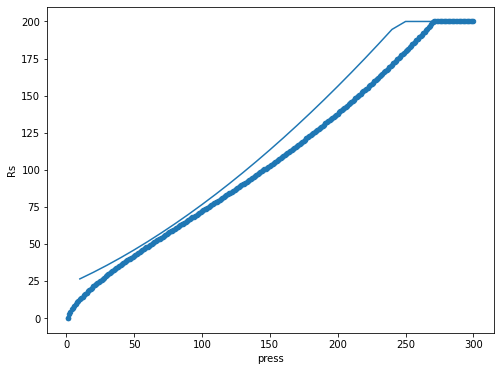

In [124]:
import matplotlib.pyplot as plt 
temp = 60 
pb = 270 # bar
sto_api = 38.828 
sg_gas = 0.85
rsb = 200

rs= []
p = []
c= Oil()
for press in range(10, 300,10):
    p.append(press)
    rs.append(c.calculate_rs(temp=temp, press=press, rsb=rsb, sg_gas=sg_gas, sto_api=sto_api, correlation="petrosky" ))


fig, ax = plt.subplots (figsize=(8,6))
ax.plot(p,rs)

data.plot(x="press", y="Rs", kind="scatter" , ax=ax)





## Check Volume formation factor 

In [60]:
help(c.oil_bob)

Help on method oil_bob in module pypvt.pvt_correlations.oil_correlation:

oil_bob(temp, rs, sto_api, sg_gas, unit_system='metric', correlation='standing') method of pypvt.pvt_correlations.oil_correlation.Oil instance
    oil formation volume factor at bubble-point pressure
    
    Application range : xxxx
    
    Input:
        temp    : reservoir temperature (metric: Celcius, field Farenheit)
        rs      : single-stage gas-oil solution ratio (metric: sm3/sm3, field: scf/stb )
        sg_gas  : surface gas specific gravity (dens/dens_air)
        sto_api  : oil api
        unit_system : "metric" or "field"
        correlation: correlation to be used for know only those correlations are implemented
                     - standing : Standing correlation
                     - vasquezbeggs : Vazquez and Beggs correlation
                     - glaso : Glaso's correlation
                     - marhoun : Marhoun correlatio
                     - petrosky : Petrosky and Farshad
    
 

<AxesSubplot:xlabel='press', ylabel='bo'>

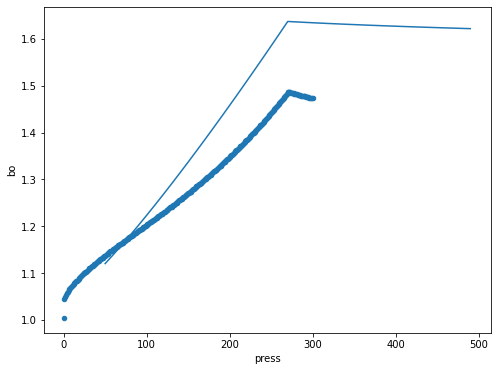

In [125]:
bo= []
p = []
c= Oil()
for press in range(50, 500,10):
    p.append(press)
    #rs.append(c.calculate_rs(temp=temp, press=press, pb=pb, sg_gas=sg_gas, sto_api=sto_api, correlation="petrosky" ))
    bo.append(c.oil_bo (press=press, pb=pb, temp=temp,  sg_gas = sg_gas, sto_api=38, correlation="vasquezbeggs"))

fig, ax = plt.subplots (figsize=(8,6))
ax.plot(p,bo)

data.plot(x="press", y="bo", kind="scatter" , ax=ax)

<AxesSubplot:xlabel='press', ylabel='density'>

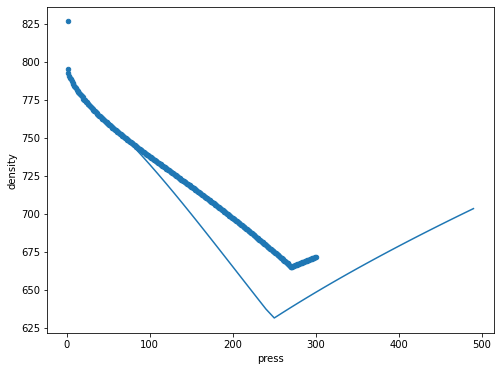

In [126]:
bo= []
p = []
c= Oil()
for press in range(50, 500,10):
    p.append(press)
    #rs.append(c.calculate_rs(temp=temp, press=press, pb=pb, sg_gas=sg_gas, sto_api=sto_api, correlation="petrosky" ))
    bo.append(c.oil_den (press=press,rs=200, temp=temp,  sg_gas = sg_gas, sto_api=38.3, correlation="petrosky"))

fig, ax = plt.subplots (figsize=(8,6))
ax.plot(p,bo)

data.plot(x="press", y="density", kind="scatter" , ax=ax)

<AxesSubplot:xlabel='press', ylabel='viscosity'>

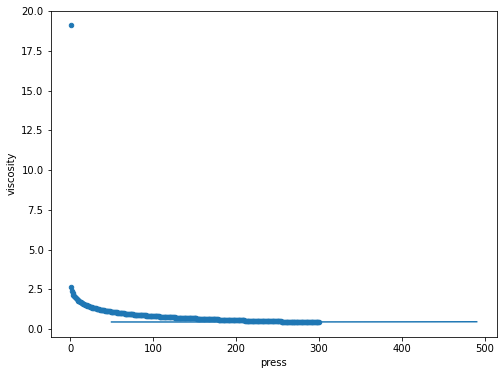

In [135]:
bo= []
p = []
c= Oil()
for press in range(50, 500,10):
    p.append(press)
    #rs.append(c.calculate_rs(temp=temp, press=press, pb=pb, sg_gas=sg_gas, sto_api=sto_api, correlation="petrosky" ))
    bo.append(c.oil_viscosity(sto_api=sto_api, temp= temp, pb=pb, press= press, rs=rsb, oiltype="undersaturated",correlation = "vasquezbeggs"))

fig, ax = plt.subplots (figsize=(8,6))
ax.plot(p,bo)

data.plot(x="press", y="viscosity", kind="scatter" , ax=ax)

0.4429237897565384

In [160]:
c= Oil()
c.oil_bo(temp=temp, sg_gas=sg_gas, pb=pb,press=press, sg_oil=0.83, correlation="standing")

266.24762597612005
1.8711781455539125
0.0017884376732413144
0.9854903731707008


1.844028048930785

## Sg Evolved gas 

testing the sg evolved gas equation

In [103]:
help(c.sg_evolved_gas)

Help on method sg_evolved_gas in module pypvt.pvt_correlations.oil_correlation:

sg_evolved_gas(press: float, temp: float, rsb: float, sto_api: float, sg: float, unit_system='metric') -> float method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Returns estimated specific gravity of gas evolved from oil insitu due to depressurization below Pb
    uses McCain & Hill Correlation (1995, SPE 30773)
    
        press: Pressure 
        temp: Temperature 
        rsb: Oil solution GOR at Pb 
        api: Stock tank oil density (API)
        sg: Specific gravity of separator gas (relative to air)



In [112]:
c.sg_evolved_gas(press= 4000, temp= 250 , rsb= 100, sto_api=40, sg_gas= 0.85)

0.85

In [115]:
help(c.sg_st_gas)

Help on method sg_st_gas in module pypvt.pvt_correlations.oil_correlation:

sg_st_gas(press_sp: float, rsp: float, sto_api: float, sg_sp: float, temp_sp: float, unit_system: str = 'metric') -> float method of pypvt.pvt_correlations.oil_correlation.Oil instance
    Estimates specific gravity of gas evolving from stock tank
    from oil API and separator gas properties & conditions
    Returns sg_st (Stock Tank gas SG relative to air).
    Correlation reproduced from Valko McCain 2003 paper Eq 4-2
    
    press_sp: Separator pressure 
    rsp: Separator GOR (separator )
    api: Stock tank oil density (API)
    sg_sp: Separator gas specific gravity relative to air
    temp_sp: Separator temperature



In [116]:
c.sg_st_gas(press_sp= 200, temp_sp= 250 , rsp= 100, sto_api=40, sg_sp= 0.85)

249.42097454445252


12081367.262751805

## Dry gas correlation

library for main dry gas correlations

In [243]:

"""
INPUT
"""
pressure = 300 # bar
temp = 120 # degC
sg = 0.85 # specific gravity
x_h2s = 0.02 # mole fraction of H2S in gas
x_co2 = 0.1 # mole fraction of CO2 in gas

"""
CALCULATOR
"""
# initialize a dry gas object 
c = DryGas ()


zfactor = c.gas_zfactor (temp_i = temp , press_i = pressure, sg = sg, unit_system="metric")

gas_density = c.gas_density ( temp_i = temp, press_i = pressure , sg=sg, unit_system="metric" )

bg = c.gas_fvf( temp_i = temp, press_i = pressure , sg=sg , unit_system="metric")
mu = c.gas_viscosity(temp_i = temp, press_i=pressure, sg=sg , unit_system="metric")

print (f" *********************\n")
print (f" OUTPUT\n")
print (f" Z factor : {zfactor} \n")
print (f" density : {gas_density} \n")
print (f" bg : {bg} \n")
print (f" viscosity : {mu} \n")

density converted to kg/m3 
 *********************

 OUTPUT

 Z factor : 0.9565772692346955 

 density : 674.1228121577589 

 bg : 0.004400798003103045 

 viscosity : 0.26846386437984693 



## Black oil PVT table

In [139]:
from pypvt.pvt_correlations.blackoil import OilGas

In [166]:
OilGas(sto_api = 40, sg_gas=0.85, temp=80,rsb=200,pmin=100, pmax=300, unit_system="metric").get_bo_pvt_table()

,press,temp,rs,bo,deno,uo,co,gas zfactor,bg,deng,cg,ug,bw,uw
0,100,80,74.668713,1.278143,711.725141,0.574797,0.000563,0.824765,0.010225,367.237208,0.006947,6.933130e+22,1.022873,0.202594
1,120,80,88.358924,1.318810,699.617028,0.521194,0.000501,0.805825,0.008325,451.042173,0.004781,4.963442e+30,1.021994,0.202594
2,140,80,103.010296,1.361974,687.043644,0.472644,0.000459,0.795267,0.007042,533.202182,0.003375,7.895023e+38,1.021118,0.202594
3,160,80,118.600228,1.407617,674.127647,0.429296,0.000429,0.792895,0.006144,611.196592,0.002466,1.241518e+47,1.020245,0.202594
4,180,80,135.108432,1.455720,660.984016,0.391125,0.000407,0.797756,0.005495,683.406521,0.001872,1.019955e+55,1.019376,0.202594
5,200,80,152.516543,1.506267,647.718083,0.357991,0.000391,0.808596,0.005012,749.161601,0.001472,2.943486e+62,1.018509,0.202594
6,220,80,170.807812,1.559245,634.424301,0.329686,0.000378,0.824195,0.004645,808.480971,0.001195,2.475937e+69,1.017646,0.202594
7,240,80,189.966873,1.614640,621.185670,0.305977,0.000369,0.843513,0.004357,861.779476,0.000997,5.828078e+75,1.016786,0.202594
8,260,80,200.000000,1.642291,608.073683,0.342480,0.000352,0.865715,0.004128,909.651645,0.000850,4.021843e+81,1.015929,0.202594
9,280,80,200.000000,1.639742,595.148684,0.343048,0.000327,0.890145,0.003941,952.739461,0.000738,8.916672e+86,1.015075,0.202594


In [215]:
! pip install pyrestoolbox

  Using cached pyrestoolbox-1.4.2-py3-none-any.whl (103 kB)
  Using cached gwr_inversion-1.0.1-py3-none-any.whl (5.9 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [235]:
from pyrestoolbox import pyrestoolbox as rtb
results = rtb.make_bot_og(pvto=True, pi=4000, api=38, degf=175, sg_g=0.68, pmax=5500, pb=4500, nrows=10, export=True)

Iteratively solving for Rsb fraction to use at maximum pressure to deliver appropriate Pb and Rsb



In [298]:
results['bot']

,Pressure (psia),Rs (mscf/stb),Bo (rb/stb),Deno (lb/cuft),uo (cP),Co (1/psi),Gas Z (v/v),Bg (rb/mscf,Cg (1/psi),ug (cP),Bw (rb/stb),uw (cP)
0,25.000000,0.014731,1.068690,48.849156,1.673743,0.000935,0.997700,127.542691,0.040092,0.012683,1.027654,0.356024
1,807.142857,0.262524,1.172616,46.469701,0.791580,0.000106,0.932628,3.692783,0.001316,0.013757,1.025136,0.357633
2,1589.285714,0.429424,1.241518,45.131207,0.621664,0.000068,0.888450,1.786598,0.000673,0.015625,1.022662,0.359230
3,2371.428571,0.602011,1.313115,43.883269,0.520496,0.000058,0.874181,1.178113,0.000420,0.018135,1.020230,0.360813
4,3153.571429,0.806010,1.399111,42.531449,0.444114,0.000057,0.889406,0.901349,0.000278,0.021027,1.017841,0.362383
5,3935.714286,1.060936,1.508683,41.001702,0.381293,0.000057,0.926288,0.752174,0.000192,0.024021,1.015491,0.363941
6,4000.000000,1.084702,1.518999,40.867605,0.376597,0.000057,0.930023,0.743069,0.000187,0.024266,1.015299,0.364069
7,4500.000000,1.286371,1.607106,39.785045,0.342214,0.000057,0.961822,0.683090,0.000152,0.026143,1.013820,0.365058
8,4717.857143,1.384274,1.650188,39.293809,0.328351,0.000056,0.976974,0.661811,0.000139,0.026944,1.013180,0.365487
9,5500.000000,1.792611,1.831353,37.464180,0.283666,0.000050,1.036125,0.602067,0.000105,0.029717,1.010907,0.367021


In [260]:
df= OilGas(sto_api = 38, sg_gas=0.68, temp=175,pb=4500,pmin=25, pmax=5500,step=400, unit_system="field").get_bo_pvt_table()
df

c:\Appl\py39_venv\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


,press,temp,rs,bo,deno,uo,co,gas zfactor,bg,deng,cg,ug,dzdp,bw,uw
0,25,175,84.563126,1.080395,48.483827,1.219075,0.001564,1.000000,0.718121,0.262228,NaN,0.012899,NaN,1.026875,0.016208
1,425,175,130.108251,1.104062,48.013421,0.976685,0.000097,0.959997,0.040553,4.643630,0.002352,0.015049,-8.818739e-05,1.025645,0.016208
2,825,175,183.664556,1.130343,47.458455,0.808133,0.000053,0.926391,0.020159,9.341104,0.001148,0.019266,-7.614091e-05,1.024420,0.016208
3,1225,175,244.812120,1.159192,46.826563,0.686350,0.000038,0.898457,0.013167,14.301362,0.000692,0.026380,-6.083341e-05,1.023201,0.016208
4,1625,175,313.218631,1.190567,46.126211,0.596861,0.000031,0.877933,0.009699,19.414707,0.000445,0.038080,-4.225042e-05,1.021988,0.016208
5,2025,175,388.611188,1.224436,45.366573,0.530541,0.000027,0.866067,0.007678,24.525194,0.000297,0.056959,-2.132766e-05,1.020781,0.016208
6,2425,175,470.759592,1.260769,44.557240,0.481411,0.000024,0.863171,0.006390,29.468196,0.000206,0.086573,1.498977e-07,1.019580,0.016208
7,2825,175,559.465675,1.299540,43.707903,0.445499,0.000022,0.868597,0.005520,34.114488,0.000149,0.131332,2.023457e-05,1.018386,0.016208
8,3225,175,654.556108,1.340727,42.828045,0.420166,0.000021,0.881114,0.004905,38.391603,0.000112,0.196257,3.756834e-05,1.017197,0.016208
9,3625,175,755.877316,1.384310,41.926684,0.403701,0.000020,0.899355,0.004454,42.278106,0.000088,0.286670,5.164448e-05,1.016014,0.016208


<AxesSubplot:xlabel='Pressure (psia)'>

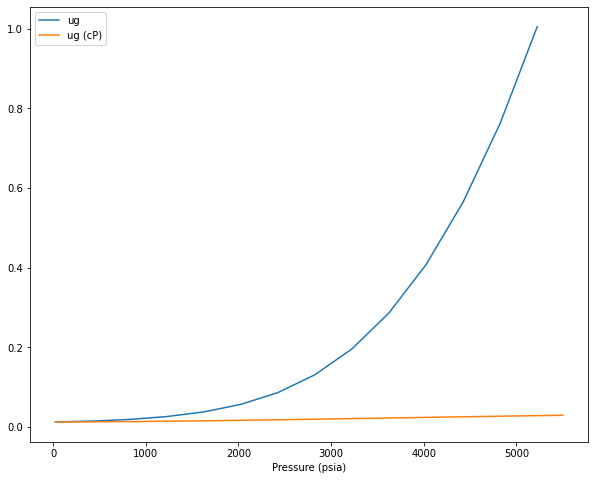

In [261]:
fig, ax = plt.subplots(figsize=(10,8))
temp =df.copy()
temp["rs"]= temp["rs"].div(1000)
temp.plot(x="press", y="ug", ax=ax)
results['bot'].plot(x='Pressure (psia)' , y ='ug (cP)', ax=ax)


In [267]:
df

,press,temp,rs,bo,deno,uo,co,gas zfactor,bg,deng,cg,ug,dzdp,bw,uw
0,25,175,84.563126,1.080395,48.483827,1.219075,0.001564,1.000000,0.718121,0.262228,NaN,0.012899,NaN,1.026875,0.016208
1,425,175,130.108251,1.104062,48.013421,0.976685,0.000097,0.959997,0.040553,4.643630,0.002352,0.015049,-8.818739e-05,1.025645,0.016208
2,825,175,183.664556,1.130343,47.458455,0.808133,0.000053,0.926391,0.020159,9.341104,0.001148,0.019266,-7.614091e-05,1.024420,0.016208
3,1225,175,244.812120,1.159192,46.826563,0.686350,0.000038,0.898457,0.013167,14.301362,0.000692,0.026380,-6.083341e-05,1.023201,0.016208
4,1625,175,313.218631,1.190567,46.126211,0.596861,0.000031,0.877933,0.009699,19.414707,0.000445,0.038080,-4.225042e-05,1.021988,0.016208
5,2025,175,388.611188,1.224436,45.366573,0.530541,0.000027,0.866067,0.007678,24.525194,0.000297,0.056959,-2.132766e-05,1.020781,0.016208
6,2425,175,470.759592,1.260769,44.557240,0.481411,0.000024,0.863171,0.006390,29.468196,0.000206,0.086573,1.498977e-07,1.019580,0.016208
7,2825,175,559.465675,1.299540,43.707903,0.445499,0.000022,0.868597,0.005520,34.114488,0.000149,0.131332,2.023457e-05,1.018386,0.016208
8,3225,175,654.556108,1.340727,42.828045,0.420166,0.000021,0.881114,0.004905,38.391603,0.000112,0.196257,3.756834e-05,1.017197,0.016208
9,3625,175,755.877316,1.384310,41.926684,0.403701,0.000020,0.899355,0.004454,42.278106,0.000088,0.286670,5.164448e-05,1.016014,0.016208


In [268]:
df['rs']

0      84.563126
1     130.108251
2     183.664556
3     244.812120
4     313.218631
5     388.611188
6     470.759592
7     559.465675
8     654.556108
9     755.877316
10    863.291784
11    976.675274
12    998.589853
13    998.589853
Name: rs, dtype: float64

In [303]:
rsb = df['rs'].iloc[0]

pmin, pmax = 10.0 , 4000


for rsb in df['rs']:

    # calculate pb 
    pb = Oil().oil_pbubble(sto_api = 40, sg_gas=0.85, temp=80,rs=rsb, unit_system="metric")
    bos = []

    p =pmin
    print(pb) 
    while p <=pmax:
        if pb < p:
            bo = Oil().oil_bo(press=p, temp=120, sg_gas=0.85, pb=pb, sto_api=40)

            mu = Oil().oil_viscosity(sto_api=40, temp= 120, press= p, rs=rsb, pb=pb, oiltype="undersaturated",correlation = "vasquezbeggs", unit_system="metric")
            print (f"rs  {rsb}:  pressure: {p}      bo: {bo}       mu: {mu}" )
            bos.append(bo)

        p +=(pmax-pmin)/20
    print ("******************************")

107.59517191421743
rs  84.56312554163812:  pressure: 409.0      bo: 1.2258972756659439       mu: 0.39322227482010996
rs  84.56312554163812:  pressure: 808.0      bo: 1.2039329116327264       mu: 0.4406636034536765
rs  84.56312554163812:  pressure: 1207.0      bo: 1.1911706354149174       mu: 0.5168405233928995
rs  84.56312554163812:  pressure: 1606.0      bo: 1.1821707992211288       mu: 0.631093187135367
rs  84.56312554163812:  pressure: 2005.0      bo: 1.1752255357937091       mu: 0.8008639263095878
rs  84.56312554163812:  pressure: 2404.0      bo: 1.169575349112182       mu: 1.0559429185295701
rs  84.56312554163812:  pressure: 2803.0      bo: 1.1648160209205127       mu: 1.4473702418928263
rs  84.56312554163812:  pressure: 3202.0      bo: 1.1607068381329304       mu: 2.0646330964153345
rs  84.56312554163812:  pressure: 3601.0      bo: 1.157092891219706       mu: 3.0694365139746176
rs  84.56312554163812:  pressure: 4000.0      bo: 1.1538686387115522       mu: 4.7641186820616
********

In [288]:
Oil().oil_bo(temp=80, sg_gas=0.85, rs=rsb, sto_api=40, press=p)

1.071938175223267

In [297]:
df

,press,temp,rs,bo,deno,uo,co,gas zfactor,bg,deng,cg,ug,dzdp,bw,uw
0,25,175,84.563126,1.080395,48.483827,1.219075,0.001564,1.000000,0.718121,0.262228,NaN,0.012899,NaN,1.026875,0.016208
1,425,175,130.108251,1.104062,48.013421,0.976685,0.000097,0.959997,0.040553,4.643630,0.002352,0.015049,-8.818739e-05,1.025645,0.016208
2,825,175,183.664556,1.130343,47.458455,0.808133,0.000053,0.926391,0.020159,9.341104,0.001148,0.019266,-7.614091e-05,1.024420,0.016208
3,1225,175,244.812120,1.159192,46.826563,0.686350,0.000038,0.898457,0.013167,14.301362,0.000692,0.026380,-6.083341e-05,1.023201,0.016208
4,1625,175,313.218631,1.190567,46.126211,0.596861,0.000031,0.877933,0.009699,19.414707,0.000445,0.038080,-4.225042e-05,1.021988,0.016208
5,2025,175,388.611188,1.224436,45.366573,0.530541,0.000027,0.866067,0.007678,24.525194,0.000297,0.056959,-2.132766e-05,1.020781,0.016208
6,2425,175,470.759592,1.260769,44.557240,0.481411,0.000024,0.863171,0.006390,29.468196,0.000206,0.086573,1.498977e-07,1.019580,0.016208
7,2825,175,559.465675,1.299540,43.707903,0.445499,0.000022,0.868597,0.005520,34.114488,0.000149,0.131332,2.023457e-05,1.018386,0.016208
8,3225,175,654.556108,1.340727,42.828045,0.420166,0.000021,0.881114,0.004905,38.391603,0.000112,0.196257,3.756834e-05,1.017197,0.016208
9,3625,175,755.877316,1.384310,41.926684,0.403701,0.000020,0.899355,0.004454,42.278106,0.000088,0.286670,5.164448e-05,1.016014,0.016208
